In [1]:
import torch
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader

In [2]:
class DiabeteDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        xy = np.loadtxt(csv_file, delimiter=',', dtype=np.float32, skiprows=1)
        self.len = xy.shape[0]
        self.x_data = torch.from_numpy(xy[:, 0:-1]).clone().detach()
        self.y_data = torch.from_numpy(xy[:, [-1]]).clone().detach()
    def __len__(self):
        return self.len
    def __getitem__(self, index):
        return  self.x_data[index], bool(int(self.y_data[index]))

# UCI
https://github.com/MateLabs/Public-Datasets/blob/master/Datasets/diabetes.csv

In [3]:
from sampler import ImbalancedDatasetSampler

# train_dataset = DiabeteDataset('diabetes_train.csv') # 768 rows

train_dataset = DiabeteDataset('diabetes_train.csv')
test_dataset = DiabeteDataset('diabetes_test.csv')

train_loader = DataLoader(train_dataset, sampler=ImbalancedDatasetSampler(train_dataset), batch_size=2, num_workers=2)
test_loader = DataLoader(dataset=test_dataset, shuffle=True, num_workers=1)


In [4]:
len(train_loader)

350

In [5]:
class ModelDeep(torch.nn.Module):
    def __init__(self):
        """
        Input layer is (8 , 8)
        Hidder layer is (8, 8)
        Ouput layser is (8, 1)
        3 layers loss is ~5
        8 layers loss is ~4
        21 layer losss is ~4
        """
        super().__init__()
        self.l1 = torch.nn.Linear(8, 8)
        self.l2 = torch.nn.Linear(8, 8)
        self.l3 = torch.nn.Linear(8, 8)
        self.l4 = torch.nn.Linear(8, 8)
        self.l5 = torch.nn.Linear(8, 8)
        self.l6 = torch.nn.Linear(8, 8)
        self.l7 = torch.nn.Linear(8, 8)
        self.l8 = torch.nn.Linear(8, 8)
        self.l9 = torch.nn.Linear(8, 8)
        self.l10 = torch.nn.Linear(8, 8)
        self.l11 = torch.nn.Linear(8, 8)
        self.l12 = torch.nn.Linear(8, 8)
        self.l13 = torch.nn.Linear(8, 8)
        self.l14 = torch.nn.Linear(8, 8)
        self.l15 = torch.nn.Linear(8, 8)
        self.l16 = torch.nn.Linear(8, 8)
        self.l17 = torch.nn.Linear(8, 8)
        self.l18 = torch.nn.Linear(8, 8)
        self.l19 = torch.nn.Linear(8, 8)
        self.l20 = torch.nn.Linear(8, 8)
        self.l21 = torch.nn.Linear(8, 1)
    
        # Activation function
        self.activation_fn = torch.nn.LeakyReLU()
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.activation_fn(self.l1(x))
        x = self.activation_fn(self.l2(x))
        x = self.activation_fn(self.l3(x))
        x = self.activation_fn(self.l4(x))
        x = self.activation_fn(self.l5(x))
        x = self.activation_fn(self.l6(x))
        x = self.activation_fn(self.l7(x))
        x = self.activation_fn(self.l8(x))
        x = self.activation_fn(self.l9(x))
        x = self.activation_fn(self.l10(x))        
        x = self.activation_fn(self.l11(x))
        x = self.activation_fn(self.l12(x))        
        x = self.activation_fn(self.l13(x))
        x = self.activation_fn(self.l14(x))
        x = self.activation_fn(self.l15(x))
        x = self.activation_fn(self.l16(x))        
        x = self.activation_fn(self.l17(x))
        x = self.activation_fn(self.l18(x))        
        x = self.activation_fn(self.l19(x))
        x = self.activation_fn(self.l20(x))        
        x = self.sigmoid(self.l21(x))
        return x

In [31]:
class ModelWide(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = torch.nn.Linear(8, 60)
        self.l2 = torch.nn.Linear(60, 60)
        self.l3 = torch.nn.Linear(60, 60)
        self.l4 = torch.nn.Linear(60, 60)
        self.l5 = torch.nn.Linear(60, 60)
        self.l6 = torch.nn.Linear(60, 60)
        self.l7 = torch.nn.Linear(60, 60)
        self.l8 = torch.nn.Linear(60, 60)
        self.l9 = torch.nn.Linear(60, 60)
        self.l10 = torch.nn.Linear(60, 60)
        self.l11 = torch.nn.Linear(60, 60)
        self.l12 = torch.nn.Linear(60, 60)
        self.l13 = torch.nn.Linear(60, 60)
        self.l14 = torch.nn.Linear(60, 1)
    
        # Activation function
        self.activation_fn = torch.nn.ReLU()
    def forward(self, x):
        x = self.activation_fn(self.l1(x))
        x = self.activation_fn(self.l2(x))
        x = self.activation_fn(self.l3(x))
        x = self.activation_fn(self.l4(x))
        x = self.activation_fn(self.l5(x))
        x = self.activation_fn(self.l6(x))
        x = self.activation_fn(self.l7(x))
        x = self.activation_fn(self.l8(x))
        x = self.activation_fn(self.l9(x))
        x = self.activation_fn(self.l10(x))        
        x = self.activation_fn(self.l11(x))
        x = self.activation_fn(self.l12(x))        
        x = self.activation_fn(self.l13(x))
        x = self.activation_fn(self.l14(x))
        return x

In [44]:
class KopxionAkramsystems(torch.nn.Module):
    """
    loss ~0.6
    """
    def __init__(self):
        super().__init__()
        self.l1 = torch.nn.Linear(8, 32)
        self.l2 = torch.nn.Linear(32, 16)
        self.l3 = torch.nn.Linear(16, 1)
        self.activation_fn = torch.nn.LeakyReLU()
        self.sigmoid = torch.nn.Sigmoid()
    def forward(self, x):
        x = self.activation_fn(self.l1(x))
        x = self.activation_fn(self.l2(x))
        x = self.sigmoid(self.l3(x))
        return x

In [6]:
model = ModelDeep()
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [7]:
# Training
model.train()
for epoch in range(10):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        resized_target = target.view(output.shape[0], -1)
        loss = criterion(output, resized_target.float())
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

Train Epoch: 0 [0/700 (0%)]	Loss: 0.472662
Train Epoch: 0 [20/700 (3%)]	Loss: 0.978356
Train Epoch: 0 [40/700 (6%)]	Loss: 0.724691
Train Epoch: 0 [60/700 (9%)]	Loss: 0.724214
Train Epoch: 0 [80/700 (11%)]	Loss: 0.473785
Train Epoch: 0 [100/700 (14%)]	Loss: 0.473232
Train Epoch: 0 [120/700 (17%)]	Loss: 0.975224
Train Epoch: 0 [140/700 (20%)]	Loss: 0.723977
Train Epoch: 0 [160/700 (23%)]	Loss: 0.723181
Train Epoch: 0 [180/700 (26%)]	Loss: 0.722664
Train Epoch: 0 [200/700 (29%)]	Loss: 0.964439
Train Epoch: 0 [220/700 (31%)]	Loss: 0.721473
Train Epoch: 0 [240/700 (34%)]	Loss: 0.720601
Train Epoch: 0 [260/700 (37%)]	Loss: 0.950241
Train Epoch: 0 [280/700 (40%)]	Loss: 0.490267
Train Epoch: 0 [300/700 (43%)]	Loss: 0.946989
Train Epoch: 0 [320/700 (46%)]	Loss: 0.943802
Train Epoch: 0 [340/700 (49%)]	Loss: 0.716987
Train Epoch: 0 [360/700 (51%)]	Loss: 0.716082
Train Epoch: 0 [380/700 (54%)]	Loss: 0.715385
Train Epoch: 0 [400/700 (57%)]	Loss: 0.925740
Train Epoch: 0 [420/700 (60%)]	Loss: 0.71530

Train Epoch: 5 [100/700 (14%)]	Loss: 0.991527
Train Epoch: 5 [120/700 (17%)]	Loss: 0.741051
Train Epoch: 5 [140/700 (20%)]	Loss: 0.673577
Train Epoch: 5 [160/700 (23%)]	Loss: 0.693147
Train Epoch: 5 [180/700 (26%)]	Loss: 0.377421
Train Epoch: 5 [200/700 (29%)]	Loss: 0.721003
Train Epoch: 5 [220/700 (31%)]	Loss: 0.804444
Train Epoch: 5 [240/700 (34%)]	Loss: 0.342639
Train Epoch: 5 [260/700 (37%)]	Loss: 1.296594
Train Epoch: 5 [280/700 (40%)]	Loss: 0.685365
Train Epoch: 5 [300/700 (43%)]	Loss: 0.693304
Train Epoch: 5 [320/700 (46%)]	Loss: 0.700903
Train Epoch: 5 [340/700 (49%)]	Loss: 0.693163
Train Epoch: 5 [360/700 (51%)]	Loss: 0.568766
Train Epoch: 5 [380/700 (54%)]	Loss: 0.687163
Train Epoch: 5 [400/700 (57%)]	Loss: 0.684522
Train Epoch: 5 [420/700 (60%)]	Loss: 0.981954
Train Epoch: 5 [440/700 (63%)]	Loss: 0.693147
Train Epoch: 5 [460/700 (66%)]	Loss: 0.400699
Train Epoch: 5 [480/700 (69%)]	Loss: 0.534543
Train Epoch: 5 [500/700 (71%)]	Loss: 0.784738
Train Epoch: 5 [520/700 (74%)]	Los

In [34]:
from sklearn.metrics import confusion_matrix
import torch.nn.functional as F
import matplotlib.pyplot as plt
import itertools


classes = (True, False)

def boolean_output(output):
    return bool(output.view(1) > torch.tensor([0.5]))

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print(cm)
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    y_test = []
    y_pred = []
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            bool_output = boolean_output(output)
            bool_target = bool(target)
            y_test.append(bool_target)
            y_pred.append(bool_output)
            if bool_output == bool_target:
                correct += 1
    accuracy = correct/len(test_loader.dataset)
    print(f"accuracy: {accuracy}")
    # Confusion matrix
    confusion_mtx = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(confusion_mtx, classes=classes, normalize=True,
                          title='Confusion matrix')



accuracy: 0.6764705882352942
[[37  4]
 [18  9]]


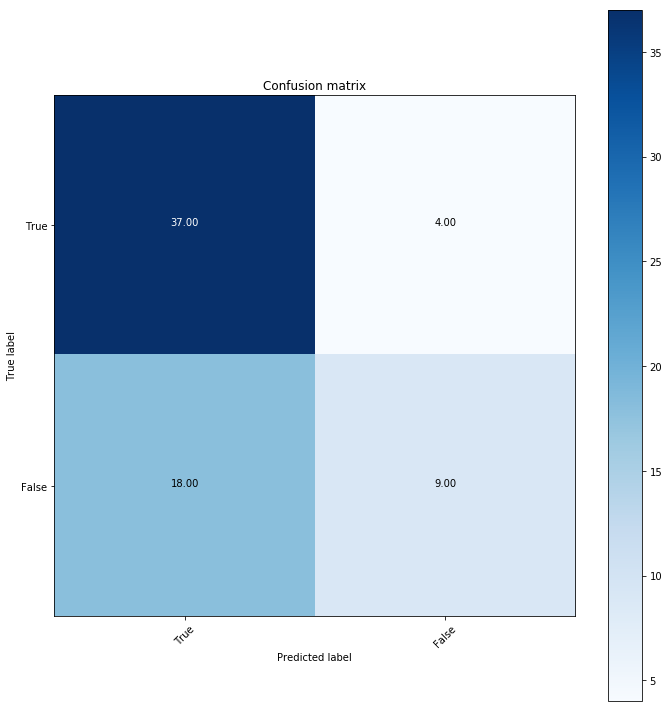

In [36]:
test(model, "cpu", test_loader)